In [2]:
'''
Ronnald R. Machado
Teste de serviços de leitura de texto
em imagens da azure.
'''

import os
import sys
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO
import json
import time
from matplotlib.patches import Polygon

In [8]:
class vision():
    '''
    Classe para
    a chamada dos serviços
    de visão da azure
    '''
  
    def __init__(self):
        '''
        Inicializa a classe
        '''
        self.subscription_key = 'sua chave'
        self.endpoint = 'seu endpoint'
    
    def call_read_api(self, image_url):
        
        '''
        Chama a API de leitura
        e imprime o resultado
        image_url(string): url da imagem desejada
        '''
        
        missing_env = False

        text_recognition_url = self.endpoint + "/vision/v3.0/read/analyze"

        

        headers = {'Ocp-Apim-Subscription-Key': self.subscription_key}
        data = {'url': image_url}
        #chamada do serviço
        response = requests.post(
            text_recognition_url, headers=headers, json=data)
        response.raise_for_status()

        #parse da resposta
        operation_url = response.headers["Operation-Location"]

        
        analysis = {}
        poll = True
        while (poll):
            response_final = requests.get(
                response.headers["Operation-Location"], headers=headers)
            analysis = response_final.json()

            print(json.dumps(analysis, indent=4))

            time.sleep(1)
            if ("analyzeResult" in analysis):
                poll = False
            if ("status" in analysis and analysis['status'] == 'failed'):
                poll = False

        polygons = []
        if ("analyzeResult" in analysis):
            
            polygons = [(line["boundingBox"], line["text"])
                        for line in analysis["analyzeResult"]["readResults"][0]["lines"]]

        # Parse da imagem com o resultado da resposta
        image = Image.open(BytesIO(requests.get(image_url).content))
        ax = plt.imshow(image)
        for polygon in polygons:
            vertices = [(polygon[0][i], polygon[0][i+1])
                        for i in range(0, len(polygon[0]), 2)]
            text = polygon[1]
            patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
            ax.axes.add_patch(patch)
            plt.text(vertices[0][0], vertices[0][1], text, fontsize=10, va="top")
        plt.show()
    
    def call_ocr_api(self, image_url):
        
        '''
        Chama a API de ocr
        e imprime o resultado
        image_url(string): url da imagem desejada
        '''
        ocr_url = self.endpoint + "vision/v3.0/ocr"

        # Set image_url to the URL of an image that you want to analyze.
        

        headers = {'Ocp-Apim-Subscription-Key': self.subscription_key}
        params = {'language': 'pt', 'detectOrientation': 'true'}
        data = {'url': image_url}
        #chama o serviço
        response = requests.post(ocr_url, headers=headers, params=params, json=data)
        response.raise_for_status()

        analysis = response.json()
        
        #imprime a resposta 
        print(analysis['regions'])
        

        # parse da resposta
        line_infos = [region["lines"] for region in analysis["regions"]]
        word_infos = []
        for line in line_infos:
            for word_metadata in line:
                for word_info in word_metadata["words"]:
                    word_infos.append(word_info)
        word_infos

        #imprime a imagem com resultados
        plt.figure(figsize=(5, 5))
        image = Image.open(BytesIO(requests.get(image_url).content))
        ax = plt.imshow(image, alpha=0.5)
        for word in word_infos:
            bbox = [int(num) for num in word["boundingBox"].split(",")]
            text = word["text"]
            origin = (bbox[0], bbox[1])
            patch = Rectangle(origin, bbox[2], bbox[3],
                              fill=False, linewidth=2, color='y')
            ax.axes.add_patch(patch)
            plt.text(origin[0], origin[1], text, fontsize=7, weight="bold", va="top")
        plt.show()
        plt.axis("off")

In [9]:
#lista de imagens
image_url = ["https://veja.abril.com.br/wp-content/uploads/2017/12/economia-cartao-cnh-3.jpg",
             "https://www.naosalvo.com.br/wp-content/uploads/2018/02/identidadefalsa.jpg",
             "https://doutormultas.com.br/wp-content/uploads/2017/01/MG_3081a-copy.jpg"]
cognitive = vision()#instancia da classe

{
    "status": "running",
    "createdDateTime": "2020-08-07T14:36:48Z",
    "lastUpdatedDateTime": "2020-08-07T14:36:48Z"
}
{
    "status": "succeeded",
    "createdDateTime": "2020-08-07T14:36:48Z",
    "lastUpdatedDateTime": "2020-08-07T14:36:50Z",
    "analyzeResult": {
        "version": "3.0.0",
        "readResults": [
            {
                "page": 1,
                "angle": 0.1201,
                "width": 3000,
                "height": 2000,
                "unit": "pixel",
                "lines": [
                    {
                        "boundingBox": [
                            787,
                            97,
                            2412,
                            111,
                            2412,
                            196,
                            787,
                            190
                        ],
                        "text": "REP\u00daBLICA FEDERATIVA DO BRASIL",
                        "words": [
              

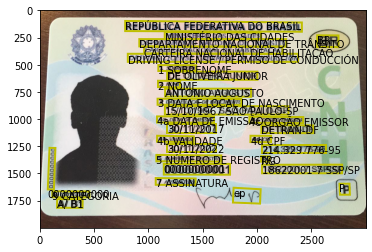

In [10]:
'''
Chamada do servico de leitura apenas da primeira imagem da lista
Para chamar todas é possível construir um loop simples
'''
cognitive.call_read_api(image_url[0])

[{'boundingBox': '789,102,1619,855', 'lines': [{'boundingBox': '789,102,1619,89', 'words': [{'boundingBox': '789,102,504,85', 'text': 'REPÚBLICA'}, {'boundingBox': '1326,127,559,63', 'text': 'FEDERATIVA'}, {'boundingBox': '1920,128,122,63', 'text': 'DO'}, {'boundingBox': '2079,128,329,63', 'text': 'BRASIL'}]}, {'boundingBox': '1161,198,868,66', 'words': [{'boundingBox': '1161,198,392,65', 'text': 'MINISTÉRIO'}, {'boundingBox': '1584,214,128,49', 'text': 'DAS'}, {'boundingBox': '1740,215,289,49', 'text': 'CIDADES'}]}, {'boundingBox': '924,263,1342,78', 'words': [{'boundingBox': '924,275,513,51', 'text': 'DEPARTAMENTO'}, {'boundingBox': '1466,278,335,50', 'text': 'NACIONAL'}, {'boundingBox': '1830,279,80,49', 'text': 'DE'}, {'boundingBox': '1935,263,331,78', 'text': 'TRÂNSITO'}]}, {'boundingBox': '963,340,1262,63', 'words': [{'boundingBox': '963,340,323,50', 'text': 'CARTEIRA'}, {'boundingBox': '1314,342,336,49', 'text': 'NACIONAL'}, {'boundingBox': '1678,343,82,49', 'text': 'DE'}, {'bou

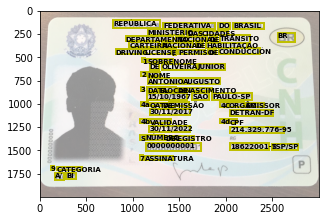

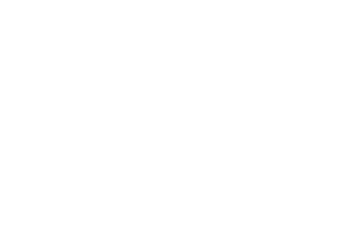

In [11]:
'''
Chamada do servico de ocr apenas da primeira imagem da lista
Para chamar todas é possível construir um loop simples
'''
cognitive.call_ocr_api(image_url[0])